<h1><b>Đặt câu hỏi, kết hợp trực quan hóa</b></h1>

<hr/>


<h3><b>Install & Import</b></h3>

Cài đặt và import những thư viện cần thiết cho phần đặt câu hỏi.

In [6]:
#Cài đặt các thư viện

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv('data/job_list.csv')
data_df.head()

,Unnamed: 0,jobId,jobTitle,userId,companyLogo,alias,approvedOn,expiredOn,companyName,companyId,...,numOfApplications,isMobileHotJob,isMobileTopJob,isBoldAndRedJob,isUrgentJob,isUrgentJobM,onlineOn,visibilityDisplay,priorityOrder,typeWorkingName
0,0,1581202,Project Management Manager - Attractive Salary...,5975282,https://images.vietnamworks.com/pictureofcompa...,project-management-manager-attractive-salary,2022-11-18 15:59:04+07:00,2022-12-18 23:59:59+07:00,Công Ty TNHH Công Nghệ Welco Việt Nam,313962,...,24,False,False,False,False,False,2022-11-26 11:34:00+07:00,False,2022-11-26 11:34:00,Full-time
1,1,1593683,Production Supervisor,5975282,https://images.vietnamworks.com/pictureofcompa...,production-supervisor-351,2022-11-18 09:38:08+07:00,2022-12-18 23:59:59+07:00,Công Ty TNHH Công Nghệ Welco Việt Nam,313962,...,7,False,False,False,False,False,2022-11-26 11:34:00+07:00,False,2022-11-26 11:34:00,Full-time
2,2,1594103,[Datatech Beeginner] Chuyên Viên Đảm Bảo An Ni...,417756,https://images.vietnamworks.com/pictureofcompa...,datatech-beeginner-chuyen-vien-dam-bao-an-ninh...,2022-11-18 18:08:52+07:00,2022-12-18 23:59:59+07:00,Ngân Hàng Thương Mại Cổ Phần Quân Đội - MB,2332,...,0,True,True,False,True,False,2022-11-26 11:34:00+07:00,False,2022-11-26 11:34:00,Full-time
3,3,1589116,"Trưởng Bộ Phận Tổng Hợp Báo Cáo, Phòng Kế Hoạc...",2859613,https://images.vietnamworks.com/pictureofcompa...,truong-bo-phan-tong-hop-bao-cao-phong-ke-hoach...,2022-11-04 09:59:37+07:00,2022-12-04 23:59:59+07:00,Ngân Hàng TMCP Đại Chúng Việt Nam,136607,...,10,True,True,False,False,False,2022-11-26 11:34:00+07:00,False,2022-11-26 11:34:00,Full-time
4,4,1589145,Lập Trình Viên Java C,1465669,https://images.vietnamworks.com/pictureofcompa...,lap-trinh-vien-java-c-1-1,2022-11-04 10:40:07+07:00,2022-12-04 23:59:59+07:00,Tập Đoàn MK - MK Group,60453,...,3,True,True,False,False,False,2022-11-26 11:34:00+07:00,False,2022-11-26 11:34:00,Full-time


#### Câu hỏi 1: 
- Hình thức làm việc  nào được ưa chuộng trong các công việc tuyển dụng. 
- Các công việc thường cung cấp những phúc lợi nào cho người ứng tuyển.
- Các công ty tuyển dụng thường có quy mô như thế nào.
- Các công việc tuyển dụng thường yêu cầu với cấp bậc nào.
- Các công việc tuyển dụng thường có mức lương dao động như thế nào.

##### Lợi ích khi trả lời câu hỏi: 
- Có được những thông tin về loại hình công việc, quy mô các công ty, lợi ích có được, cấp bậc tuyển dụng, mức lương cho các công việc để từ đó có được sự lựa chọn công việc phù hợp với nhu cầu, khả năng của bản thân. 
- Đồng thời có những hiểu biết khái quát về cơ cấu, xu hướng của thị trường việc làm hiện nay từ đó có được những định hướng cho công việc tương lai.

##### Hình thức làm việc nào được ưa chuộng trong các công việc tuyển dụng
- Trả lời: Các công việc tuyển dụng thường ưa chuộng các công việc Full-time và có nhu cầu ít hơn với những hình thức làm việc còn lại.
- Lý do : Với hình thức làm việc Full - time sẽ dễ dàng quản lý hơn các hình thức khác, hơn nữa các công ty cần những nhân viên làm việc cố định.

In [9]:
type_working = pd.Series(data_df['typeWorkingName'].value_counts())
type_working

Full-time      7956
Part-time        29
Internship       17
Freelancer       16
Other            11
Online jobs      10
Seasonal          7
Name: typeWorkingName, dtype: int64

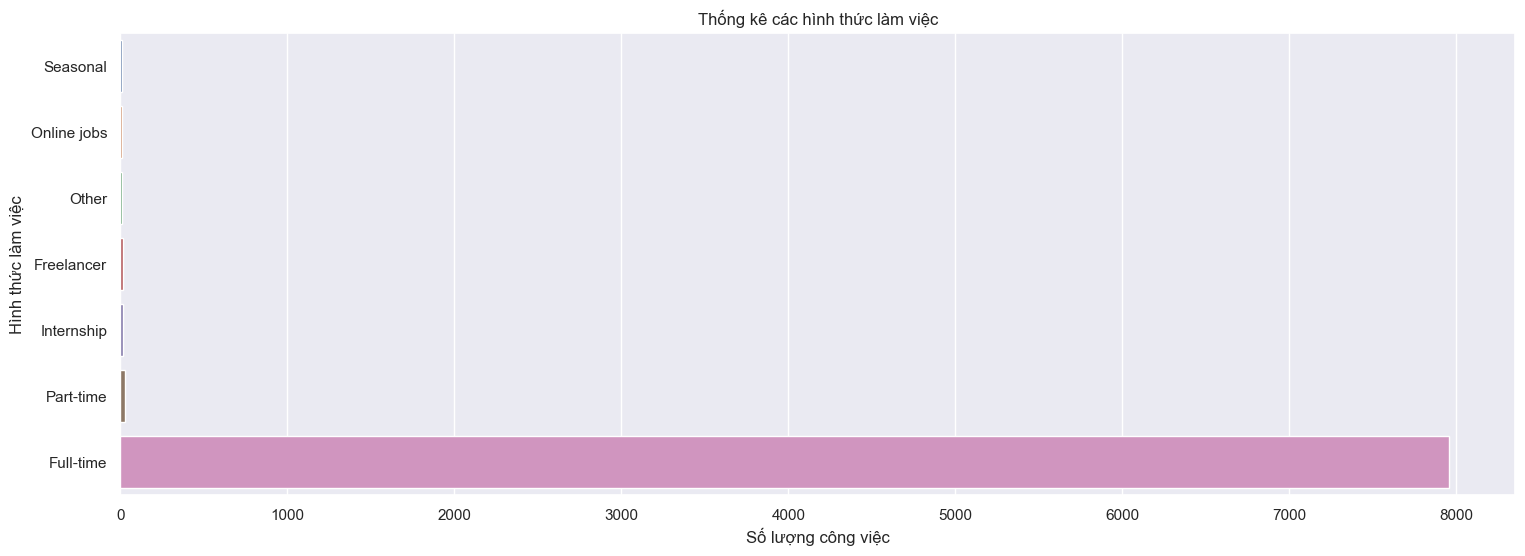

In [10]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
sns.countplot(data = data_df, y = 'typeWorkingName', order = data_df['typeWorkingName'].value_counts().sort_values().index);
plt.title('Thống kê các hình thức làm việc')
plt.ylabel('Hình thức làm việc')
plt.xlabel('Số lượng công việc');

##### Các công việc thường cung cấp phúc lợi gì cho người ứng tuyển
- Trả lời: Các công việc tuyển dụng thường cung cấp bonus cho người ứng tuyển, bên cạnh đó là Healthcare Plan, Training...
- Lý do : Đây là những điều kiện cần thiết để đủ sức hấp dẫn người ứng tuyển bên cạnh salary.

In [ ]:
#Convert multiple element to list T-T
def clean_alt_list(list_):
    if not pd.isnull(list_):
        list_ = list_.replace(';', '","')
        return '["' + list_ + '"]'
    else:
        return "[]"

In [44]:
data_benefits = data_df[['benefits']].copy()
data_benefits['benefits'] = data_benefits['benefits'].apply(clean_alt_list).apply(eval);
benefits_data = pd.Series([item for sublist in data_benefits.benefits for item in sublist])
benefits = pd.Series(benefits_data.value_counts())
benefits

Bonus                   6669
Healthcare Plan         5099
Training                2254
Paid Leave              1962
Others                  1846
Travel Opportunities    1195
Team Activities          886
Transportation           679
Awards                   631
Laptop                   620
Canteen                  337
Vouchers                 152
Mobile                    90
Library                   52
Kindergarten              33
dtype: int64

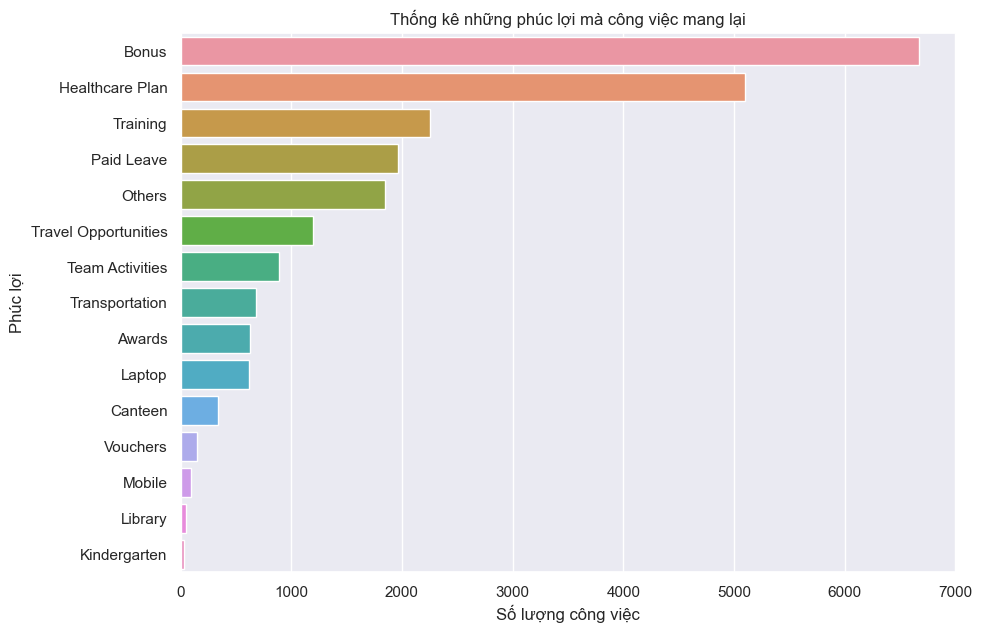

In [45]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(y =benefits.index, x = benefits.values)
plt.title('Thống kê những phúc lợi mà công việc mang lại')
plt.xlabel('Số lượng công việc')
plt.ylabel('Phúc lợi');

##### Các công ty tuyển dụng thường có quy mô như thế nào.
- Trả lời: Các công ty tuyển dụng chủ yếu có quy mô từ 100 - 499 và chỉ một số ít có quy mô 50000-100000
- Lý do: Điều này đúng với thực tiễn ở Việt Nam với số lượng lớn các công ty vừa và nhỏ, và chỉ có số ít các công ty, tập đoàn lớn.

In [13]:
company_size = pd.Series(data_df['companySize'].value_counts())
company_size

(100, 499)         2251
(25, 99)           1439
(1000, 4999)       1191
(500, 999)          757
(10, 24)            464
(5000, 9999)        351
(10000, 19999)      190
(0, 10)              90
(20000, 49999)       87
(50000, 100000)      37
Name: companySize, dtype: int64

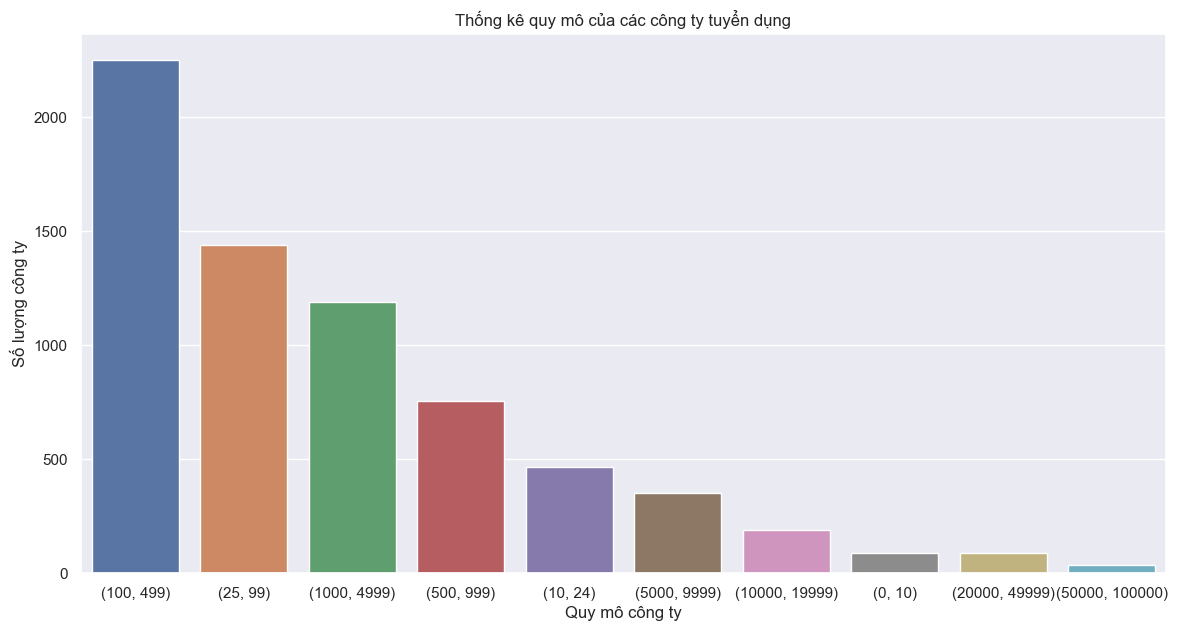

In [14]:
fig,ax = plt.subplots(figsize = (14,7))
sns.countplot(data = data_df, x = 'companySize', order = data_df['companySize'].value_counts().index);
plt.title('Thống kê quy mô của các công ty tuyển dụng')
plt.xlabel('Quy mô công ty')
plt.ylabel('Số lượng công ty');

##### Các công việc tuyển dụng thường yêu cầu với cấp bậc nào.
- Trả lời: Các công ty tuyển dụng hầu như ở cấp bậc nhân viên, và thấp nhất đối với thực tập sinh/sinh viên.
- Lý do: Các công ty chủ yếu tuyển nhân viên làm việc cho công ty, và nhân viên có thể cố gắng để nâng lên ở vị trí khác. Ngược lại, số lượng công việc cần tuyển thực tập sinh/sinh viên rất ít vì đây là nhóm đối tượng còn thiếu nhiều kinh nghiệm, cần trải qua sự đào tạo mới có thể làm việc cho công ty. 

In [15]:
job_level = pd.Series(data_df['jobLevelVI'].value_counts())
job_level

Nhân viên                  5908
Trưởng phòng               1485
Mới Tốt Nghiệp              341
Giám Đốc và Cấp Cao Hơn     264
Thực tập sinh/Sinh viên      48
Name: jobLevelVI, dtype: int64

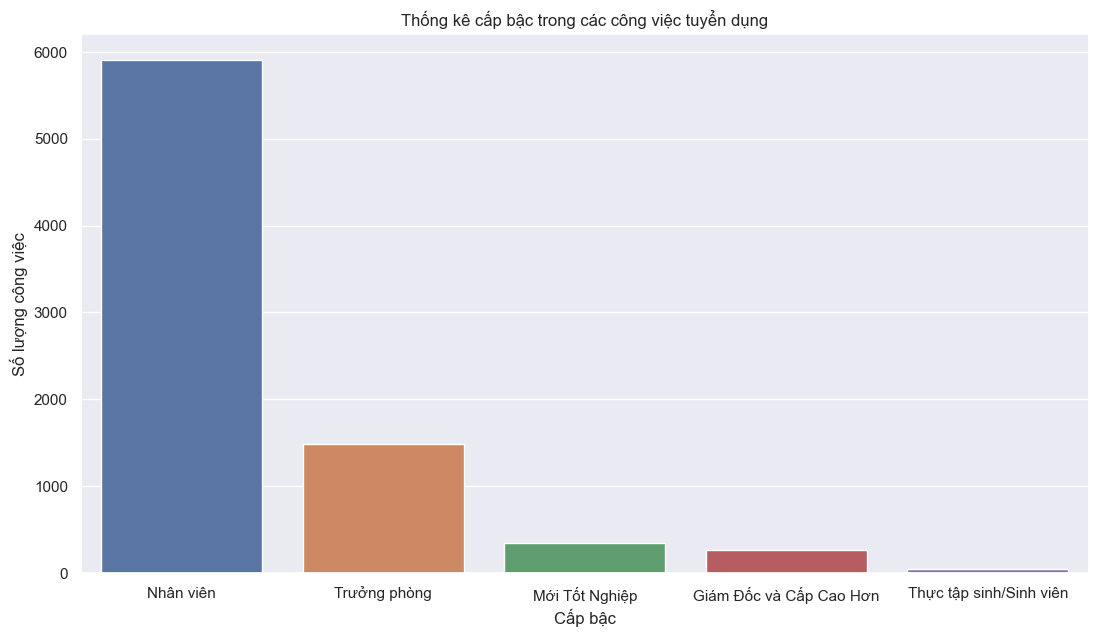

In [16]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(data = data_df, x = 'jobLevelVI', order = data_df['jobLevelVI'].value_counts().index);
plt.title('Thống kê cấp bậc trong các công việc tuyển dụng')
plt.ylabel('Số lượng công việc')
plt.xlabel('Cấp bậc');

##### Các công việc tuyển dụng thường có mức lương dao động như thế nào.
- Trả lời: Mức lương chủ yếu của các công việc tuyển dụng dao động từ 500-1000 USD là chủ yếu.
- Lý do: Có thể bị ảnh hưởng bởi các quy định về lương, mức sống, loại hình làm việc, cấp bậc trong công viêc...

In [17]:
copy_df = data_df.copy()
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,20000,150000000]
labels = ['(0,500]','(500,1000]','(1000,1500]','(1500,2000]','(2000,2500]','(2500,3000]','(3000,3500]','(3500,4000]','(4000,4500]',
'(4500,5000]','(5000,5500]','(5500,6000]','(6000,6500]','(6500,7000]','(7000,7500]','(7500,8000]','(8000,8500]',
'(8500,9000]','(9000,9500]','(9500,10000]','(10000,20000]','(20000, 150000000]']
df_count = pd.cut(copy_df['salary'],bins = bins,labels = labels).value_counts(sort = False)
df_count

(0,500]                194
(500,1000]            1224
(1000,1500]            630
(1500,2000]            336
(2000,2500]            141
(2500,3000]            120
(3000,3500]             31
(3500,4000]             45
(4000,4500]             11
(4500,5000]             37
(5000,5500]              3
(5500,6000]              5
(6000,6500]              0
(6500,7000]              2
(7000,7500]              0
(7500,8000]              4
(8000,8500]              0
(8500,9000]              0
(9000,9500]              1
(9500,10000]            13
(10000,20000]            3
(20000, 150000000]       8
Name: salary, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_23708\4072105858.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  df_count.plot.bar(y ='salary',use_index = True).figure.show();


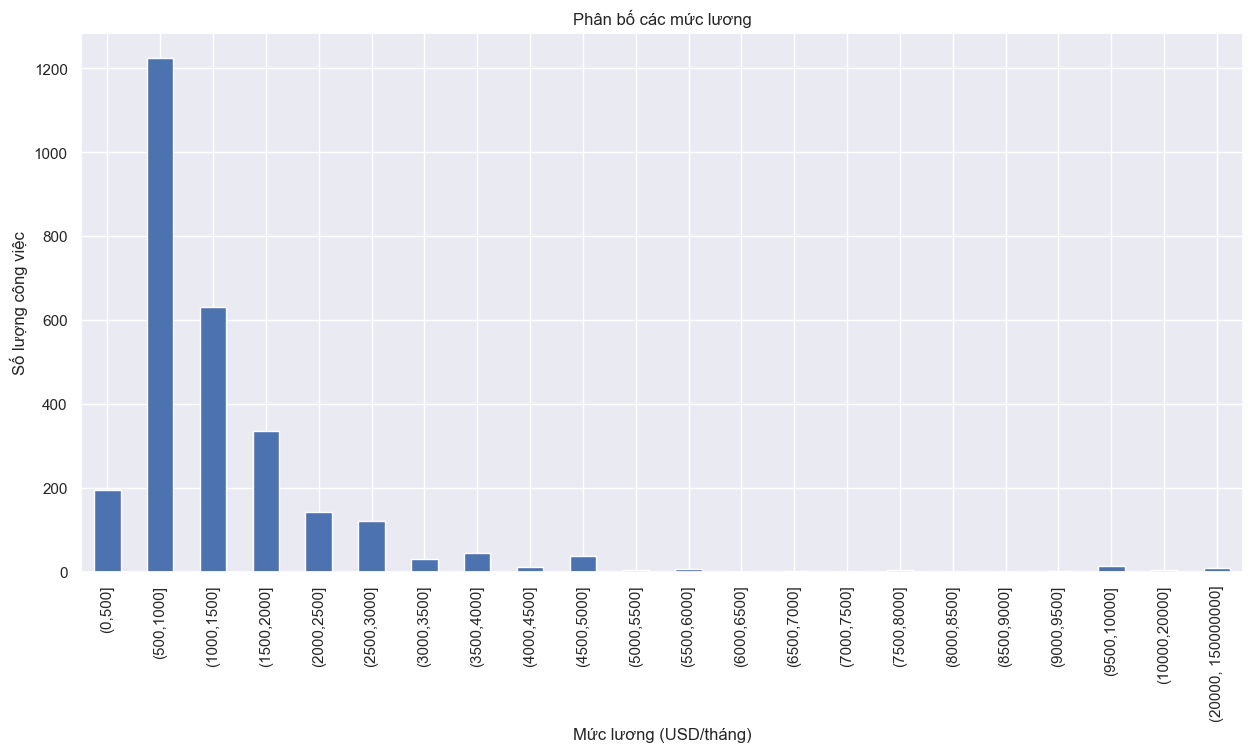

In [18]:
fig, ax = plt.subplots(figsize = (15,7))
df_count.plot.bar(y ='salary',use_index = True).figure.show();
plt.title('Phân bố các mức lương');
plt.xlabel('Mức lương (USD/tháng)')
plt.ylabel('Số lượng công việc');

#### Câu hỏi 2: Tìm hiểu về những Top 20 thú vị
- Top 20 những công ty có nhu cầu tuyển dụng cao.
- Top 20 những ngành nghề được ưa chuộng trong tuyển dụng.
- Top 20 địa điểm có lượt tuyển dụng cao.
- Top 20 kĩ năng được ưa chuộng trong tuyển dụng.

##### Lợi ích khi trả lời câu hỏi: 
- Có được những thông tin về công ty, ngành nghề, địa điểm, kĩ năng được ưa chuộng để nắm bắt được những xu hướng tuyển dụng và từ đó có được những định hướng cho công việc tương lai.

##### Top 20 những công ty có nhu cầu tuyển dụng cao

In [19]:
data_df['companyName'].value_counts()
company_name = pd.Series(data_df['companyName'].value_counts())
company_name[:20]

Navigos Search's Client                                                290
Vietnamworks' Client                                                    95
Tập Đoàn BRG (BRG GROUP)                                                85
Techcombank                                                             77
Navigos Search                                                          70
Page Group Vietnam                                                      46
Bosch Global Software Technologies Company Limited                      41
BIM Group                                                               38
Shinhan Vietnam Finance                                                 36
Sun Life Vietnam (Sun Life)                                             34
Công Ty Cổ Phần Sữa Việt Nam (Vinamilk)                                 33
Công Ty Cổ Phần Chứng Khoán SSI                                         31
Shinhan Bank Vietnam                                                    30
Ngân Hàng Thương Mại Cổ P

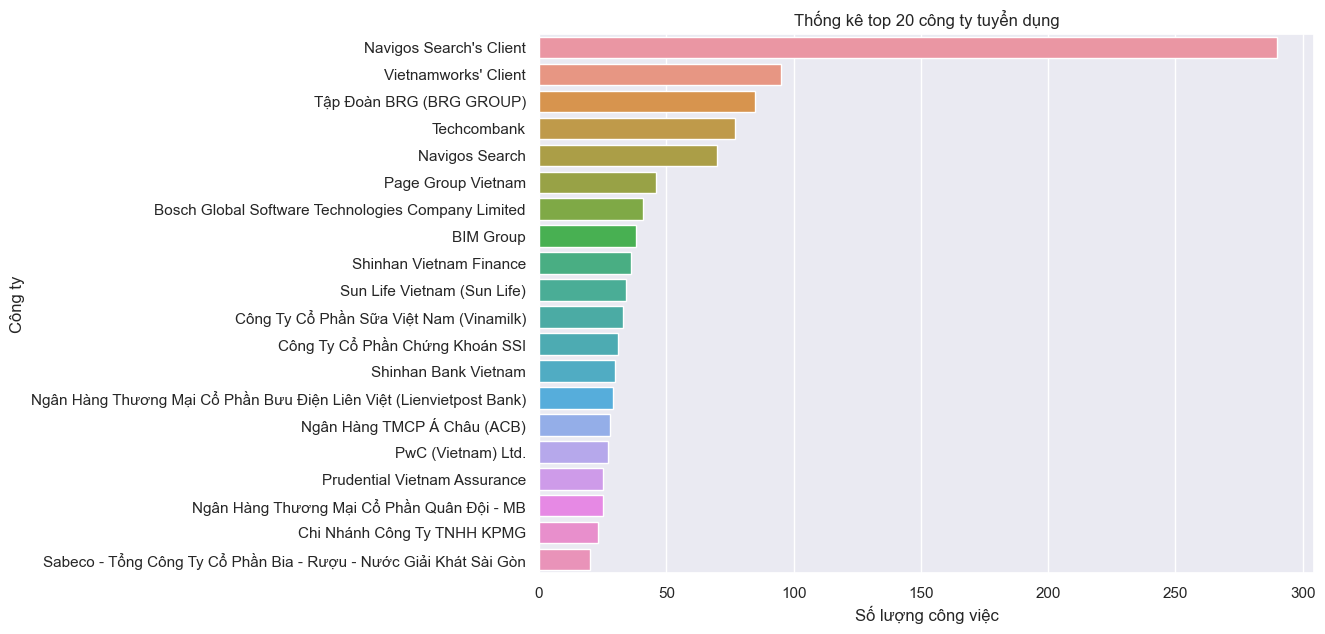

In [20]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(y =company_name[:20].index, x = company_name[:20].values)
plt.title('Thống kê top 20 công ty tuyển dụng')
plt.xlabel('Số lượng công việc')
plt.ylabel('Công ty');

##### Top 20 những ngành nghề được ưa chuộng trong tuyển dụng.

In [37]:
data_industries = data_df[['industries']].copy()
data_industries['industries'] = data_industries['industries'].apply(clean_alt_list).apply(eval)
industries = pd.Series([item for sublist in data_industries.industries for item in sublist])
industries = pd.Series(industries.value_counts())
industries[0:20]

Finance/Investment          1375
Sales                       1270
IT - Software               1044
Marketing                    842
Banking                      823
Accounting                   763
Electrical/Electronics       738
Administrative/Clerical      737
Customer Service             696
Production/Process           639
Auditing                     634
IT - Hardware/Networking     582
Civil/Construction           581
Mechanical                   572
Planning/Projects            560
Human Resources              537
Advertising/Promotion/PR     496
Education/Training           427
Executive management         372
Internet/Online Media        370
dtype: int64

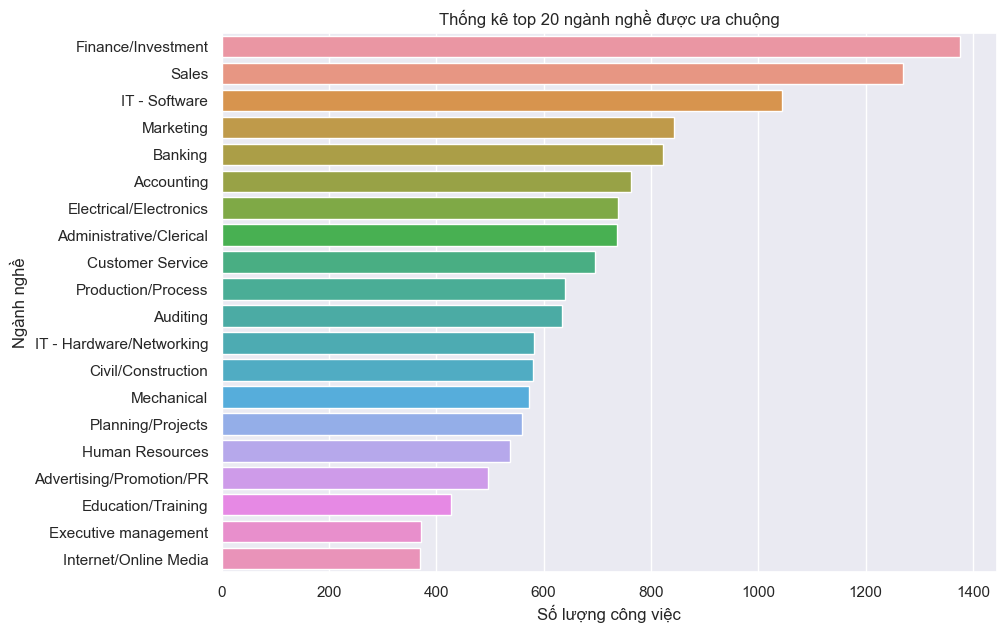

In [38]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(y =industries[:20].index, x = industries[:20].values)
plt.title('Thống kê top 20 ngành nghề được ưa chuộng')
plt.xlabel('Số lượng công việc')
plt.ylabel('Ngành nghề');

##### Top 20 địa điểm có lượt tuyển dụng cao.

In [40]:
data_locations = data_df[['workingLocations']].copy()
data_locations['workingLocations'] = data_locations['workingLocations'].apply(clean_alt_list).apply(eval)
locations = pd.Series([item for sublist in data_locations.workingLocations for item in sublist])
locations = pd.Series(locations.value_counts())
locations[:20]

Ho Chi Minh          3881
Ha Noi               3552
Bac Ninh              238
Hai Phong             234
Binh Duong            205
Da Nang               195
Dong Nai              183
Hung Yen              179
Hai Duong             172
Ha Nam                107
Bac Giang              91
International          81
Vinh Phuc              71
Long An                63
Ba Ria - Vung Tau      56
Khanh Hoa              48
Quang Ninh             46
Nghe An                37
Thai Binh              32
Bien Hoa               31
dtype: int64

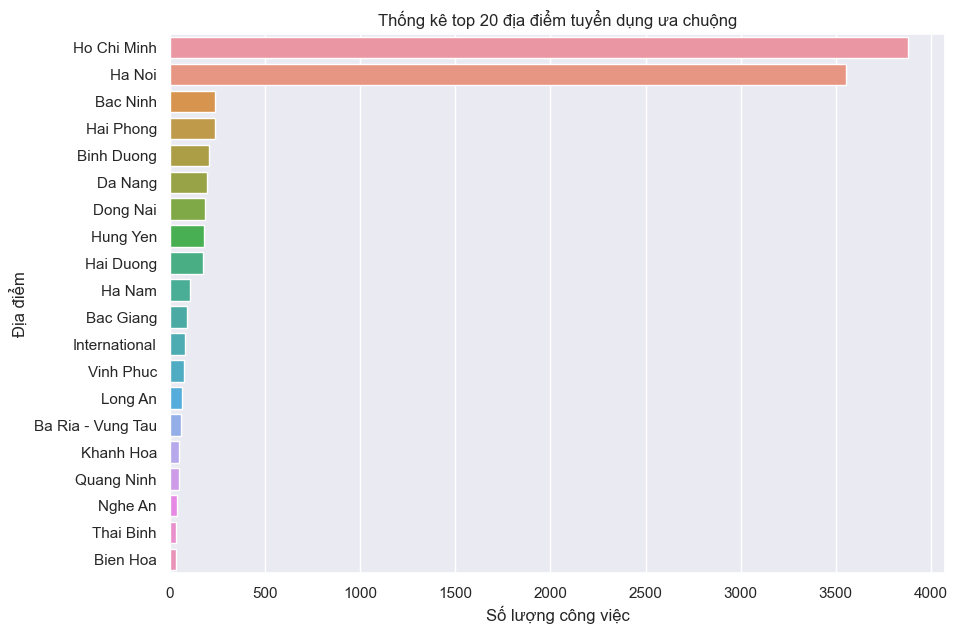

In [41]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(y =locations[:20].index, x = locations[:20].values)
plt.title('Thống kê top 20 địa điểm tuyển dụng ưa chuộng')
plt.xlabel('Số lượng công việc')
plt.ylabel('Địa điểm');

##### Top 20 kĩ năng được ưa chuộng trong tuyển dụng.

In [42]:
data_skills = data_df[['skills']].copy()
data_skills['skills'] = data_skills['skills'].apply(clean_alt_list).apply(eval)
Skills = pd.Series([item for sublist in data_skills.skills for item in sublist])
Skills = pd.Series(Skills.value_counts(ascending=False))
Skills[:20]

English                 869
Tiếng Anh               428
Kinh Doanh              323
Bán Hàng                260
Chăm Sóc Khách Hàng     255
Communication           236
Kế Toán                 236
AutoCAD                 215
Tài Chính               201
Business Development    197
Accounting              184
Digital Marketing       176
Customer Service        171
Ngân Hàng               151
Project Management      148
MS Office               147
Kiểm Toán               143
Nhân Sự                 134
Xây Dựng                134
Java                    131
dtype: int64

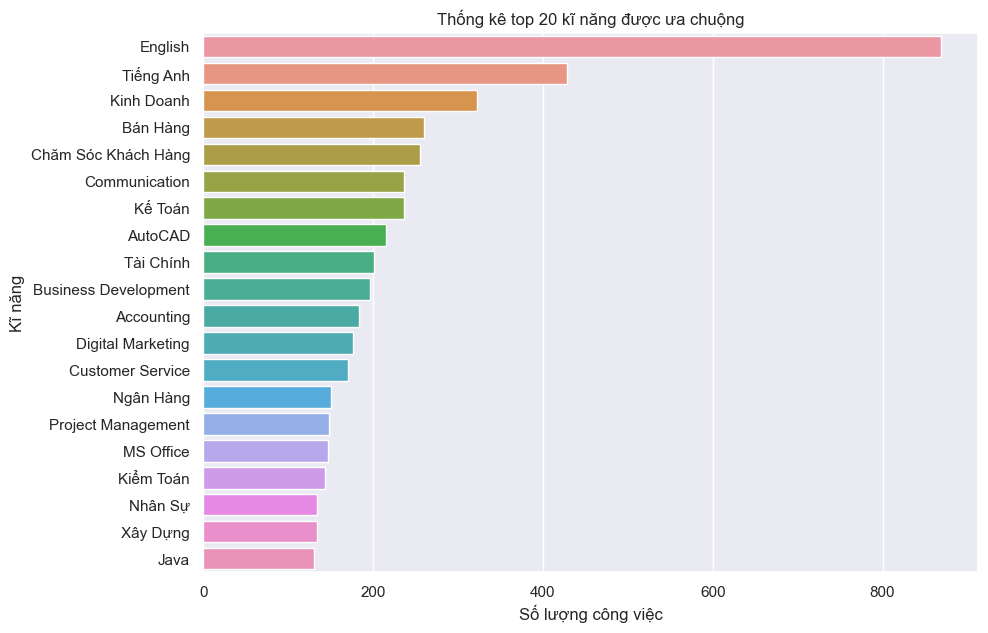

In [43]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(y =Skills[:20].index, x = Skills[:20].values)
plt.title('Thống kê top 20 kĩ năng được ưa chuộng')
plt.xlabel('Số lượng công việc')
plt.ylabel('Kĩ năng');

#### Câu hỏi 3: Các công việc thường tập trung ở đâu, thu nhập bình quân của các khu vực đó 

##### Nội dung

Các công việc được đăng tải tuyển dụng thường phân bố tập trung ở các tỉnh thành nào? Thu nhập bình quân và chênh lệch của các khu vực đó ra sao? 

##### Lợi ích khi trả lời câu hỏi

Đối với sinh viên, người đi làm:
- Xác định được những địa điểm có nhiều cơ hội việc làm, cân nhắc có nên tiếp tục làm ở địa phương hay tìm một nơi khác có nhiều thuận lợi hơn (bao gồm số lượng jobs và mức lương)

Đối với nhà tuyển dụng, nhà đầu tư:
- Nắm bắt được các thông tin về thị trường, cũng như nơi tập trung lực lượng lao động dồi dào. Từ đó tiếp tục mở những chi nhánh ở những tỉnh thành khác tiềm năng. 
- Đặt biệt đối với các doanh nghiệp nước ngoài, có thể đầu tư vào các thị trường béo bở, dồi dào nhân công (và có mức lương phải chăng) 

Đối với chính quyền địa phương:
- Đưa ra và giải quyết các câu hỏi: Tại sao tỉnh thành của mình không nằm trong top? Sao có sự chênh lệch lớn như vậy giữa các tỉnh thành? Từ đó tìm ra các nguyên nhân để cải thiện và khắc phục cho tương lai (Các vấn đề có thể đến từ nhiều yếu tố ví dụ như: cơ sở hạ tầng, giao thông kém, trình độ chuyên môn không cao,... )

##### Nguồn cảm hứng của câu hỏi:

Tự nghĩ

##### Phân tích trả lời cho câu hỏi

Chuẩn bị dữ liệu

In [3]:
locations_salary_isVisible_df = data_df[['workingLocations','salary','isSalaryVisible']].copy()

#Chuyển đơn vị tiền tệ từ VND -> USD ở một vài trường sai quy tắt. Ở đây ta xét những thu nhập có giá trị trên 1000000 là tính theo đơn vị VND. 
locations_salary_isVisible_df['salary'] = locations_salary_isVisible_df['salary'].apply(lambda x : x if x < 1000000 else int(x/23000))
locations_salary_isVisible_df['workingLocations'] = locations_salary_isVisible_df['workingLocations'].apply(lambda x : x.split(';'))
locations_salary_isVisible_df['numberOfLocations'] = 0
locations_salary_isVisible_df['numberOfVisibleSalary'] = 0
locations_salary_isVisible_df = locations_salary_isVisible_df.explode('workingLocations')
locations_salary_isVisible_df['numberOfVisibleSalary'] = locations_salary_isVisible_df.apply(lambda x : 1 if x['isSalaryVisible'] ==  True else 0,axis=1)

#Tính toán số công việc, số công việc công khai mức lương, tổng mức lương, mức lương trung bình
salary_locations_df = pd.pivot_table(locations_salary_isVisible_df,index=['workingLocations'],aggfunc={'salary': np.sum,'numberOfLocations': len, 'numberOfVisibleSalary': np.sum})
salary_locations_df['averageSalary'] = salary_locations_df.apply(lambda x : round(x['salary'] / x['numberOfVisibleSalary'] if x['numberOfVisibleSalary'] > 0 else np.nan,0),axis=1)
salary_locations_df = salary_locations_df.sort_values(by='numberOfLocations',ascending=False)

#Lấy ra 8 địa điểm có nhiều jobs tuyển dụng nhất
shortcut_salary_locations_df_df = salary_locations_df[:8]

#Gom tất cả các địa điểm còn lại thành một nhóm chung
other_salary_locations_df = pd.DataFrame(data={
    'location': ['Others'],
    'numberOfLocations': [salary_locations_df['numberOfLocations'][8:].sum()],
    'numberOfVisibleSalary': [salary_locations_df['numberOfVisibleSalary'][8:].sum()],
    'salary': [salary_locations_df['salary'][8:].sum()],
    'averageSalary': [round(salary_locations_df['averageSalary'][8:].mean(),0)]
})
other_salary_locations_df.set_index('location',inplace=True)

#Kết hợp 2 nhóm phía trên lại với nhau
highest_salary_locations_df = pd.concat([shortcut_salary_locations_df_df,other_salary_locations_df])
highest_salary_locations_df

,numberOfLocations,numberOfVisibleSalary,salary,averageSalary
Ho Chi Minh,3881,1244,2008701,1615.0
Ha Noi,3552,1431,2133739,1491.0
Bac Ninh,238,74,91355,1235.0
Hai Phong,234,86,85657,996.0
Binh Duong,205,54,76200,1411.0
Da Nang,195,75,130913,1746.0
Dong Nai,183,48,46718,973.0
Hung Yen,179,56,67570,1207.0
Others,1331,485,712709,1391.0


Trực quan hóa

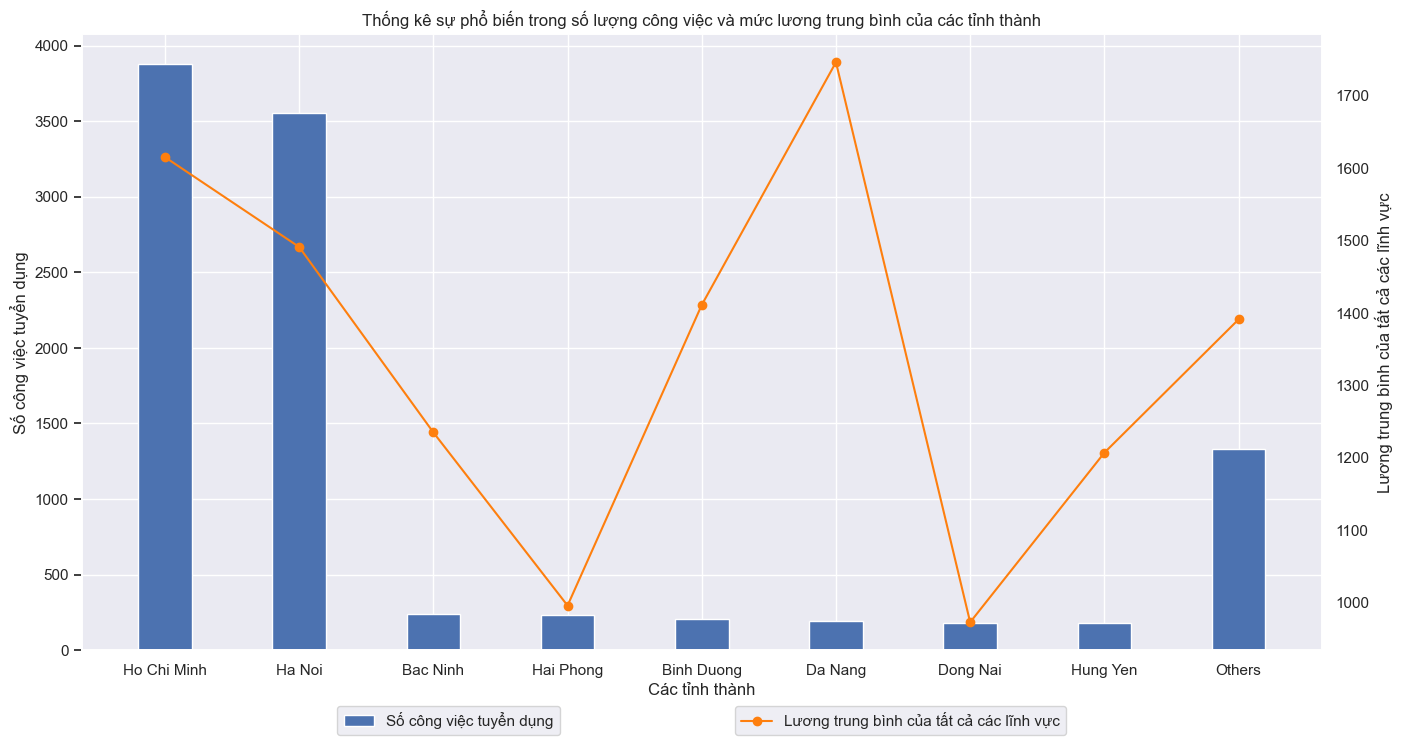

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(highest_salary_locations_df.index,highest_salary_locations_df['numberOfLocations'],width=0.4)
ax.set_xlabel('Các tỉnh thành')
ax.set_ylabel('Số công việc tuyển dụng')
ax.tick_params(left=False)
ax.legend(['Số công việc tuyển dụng'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(highest_salary_locations_df.index,highest_salary_locations_df[['averageSalary']],marker='o',color='#fe7f0e')
ax2.set_ylabel('Lương trung bình của tất cả các lĩnh vực')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Lương trung bình của tất cả các lĩnh vực'],loc='lower right',bbox_to_anchor=(0.8, -0.15))

plt.title('Thống kê sự phổ biến trong số lượng công việc và mức lương trung bình của các tỉnh thành')
plt.show()

Trả lời câu hỏi:
- Hồ Chí Minh và Hà Nội vẫn là nơi có số lượng công việc nhiều nhất. Bởi vì đây là những nơi tập trung của nhiều dân cư, trường học, đô thị. Bên cạnh đó được tạo nhiều điều kiện thuận lợi để phát triển từ chính quyền địa phương như: Cải thiện cơ sở hạ tầng, giao thông cũng như nới lỏng các chính sách cho những nhà đầu tư nước ngoài.

- Đà Nẵng, Hồ Chí Minh, Hà Nội, là nhưng nơi có mức lương trung bình cao nhất trong số những nơi có job nhiều. Đặc biệt Đà Nẵng dù có ít công việc hơn song được chi trả vô cùng hậu hĩnh. Lý do ở đây, có thể đến từ nhiều nguyên nhân. Một trong số đó có thể là về cơ cấu nền kinh tế của mỗi khu vực khi có rất nhiều tỉnh thành có ngành công nghiệp chiếm tỉ trọng cao nhất như Hồ Chí Minh, Hà Nội, Bắc Ninh, Bình Dương,... Thì dịch vụ và du lịch lại chiếm tỉ trọng cao nhất ở Đà Nẵng. Với việc thu hút hàng triệu khách du lịch mỗi năm (trong đó có số lượng lớn khách nước ngoài) thì việc được chi trả cao cũng là điều dễ hiểu.

#### Câu hỏi 4: Những lĩnh vực có lượt đăng tải công việc và số lượng ứng viên đăng kí nhiều nhất.

##### Nội dung

Cho biết những lĩnh vực có số lượng công việc được đăng tải nhiều nhất cùng với đó là lượng ứng viên đăng kí tương ứng.

##### Lợi ích khi trả lời câu hỏi

Đối với sinh viên, người đi làm:
- Xác định được xu hướng công việc tại thời hiện tại đang tập trung ở những lĩnh vực nào. Từ đó vạch ra những định hướng nghề nghiệp, chiến lược học tập cho bản thân. Ngoài ra, với người đi làm, cân nhắc lựa chọn cho mình một bến đỗ, một lĩnh vực mới để tìm thêm những thử thách, cơ hội khác nếu không hạnh phúc với công việc hiện tại.

Đối với các trường đại học, trung tâm dạy nghề: 
- Theo kịp với xu hướng chung, mở thêm các ngành đào tạo ứng với những ngành nghề, lĩnh vực có nhu cầu tuyển dụng cao. 
- Nâng cao chất lượng giảng dạy, đảm bảo các sinh viên ra trường phải được trang bị những kiến thức nền tảng thật tốt để đáp ứng các yêu cầu của doanh nghiệp đặc biệt những ngành hot, có sự cạnh tranh cao.

Đối với nhà tuyển dụng, doanh nghiệp:
- Tạo cơ hội thực tập cho các sinh viên tại các trường đại học.
- Mở các khóa đào tạo nghề, cam kết có việc làm sau khi hoàn tất quá trình đào tạo
- Với nhu cầu tuyển dụng cao, nhưng kèm theo đó lượng thí sinh đăng kí cũng nhiều. Chính vì vậy, cần đảm bảo thí sinh đáp ứng đủ năng lực, trình độ. Bên cạnh đó mở rộng hợp tác với các trường đại học hàng đầu đào tạo các ngành nghề theo nhu cầu của công ty

##### Nguồn cảm hứng của câu hỏi:
Tham khảo từ "Báo cáo thị trường IT Việt Nam – Tech Hiring 2022" - TopDev 

<a>https://topdev.vn/page/vietnam-it-market-reports</a>

##### Phân tích trả lời cho câu hỏi

Chuẩn bị dữ liệu

In [5]:
industries_applications_df = data_df[['industries','numOfApplications']].copy()

industries_applications_df['numOfIndustries'] = 0
industries_applications_df['industries'] = industries_applications_df['industries'].apply(lambda x : x.split(';'))
industries_applications_df = industries_applications_df.explode('industries')
industries_applications_df = pd.pivot_table(industries_applications_df,index=['industries'],aggfunc={'numOfApplications': np.sum,'numOfIndustries': len})
industries_applications_df = industries_applications_df.sort_values(by='numOfIndustries',ascending=False)

#Tính phần trăm số lượng công việc đăng tải và số lượng ứng viên đăng kí của từng lĩnh vực 
industries_applications_df['numOfApplications'] = industries_applications_df['numOfApplications'].apply(lambda x : round(100*(x / data_df['numOfApplications'].sum()),2))
industries_applications_df['numOfIndustries'] = industries_applications_df['numOfIndustries'].apply(lambda x : round(100*(x / data_df.shape[0]),2))
industries_applications_df.rename(columns = {'numOfApplications':'percentOfApplications', 'numOfIndustries':'percentOfIndustries'}, inplace = True)
highest_industries_df = industries_applications_df[:10].sort_values(by='percentOfIndustries',ascending=False)
highest_industries_df

,percentOfApplications,percentOfIndustries
industries,,
Finance/Investment,18.06,17.09
Sales,14.05,15.78
IT - Software,6.18,12.98
Marketing,11.60,10.46
Banking,8.58,10.23
Accounting,10.88,9.48
Electrical/Electronics,7.99,9.17
Administrative/Clerical,13.63,9.16
Customer Service,8.47,8.65


Trực quan hóa

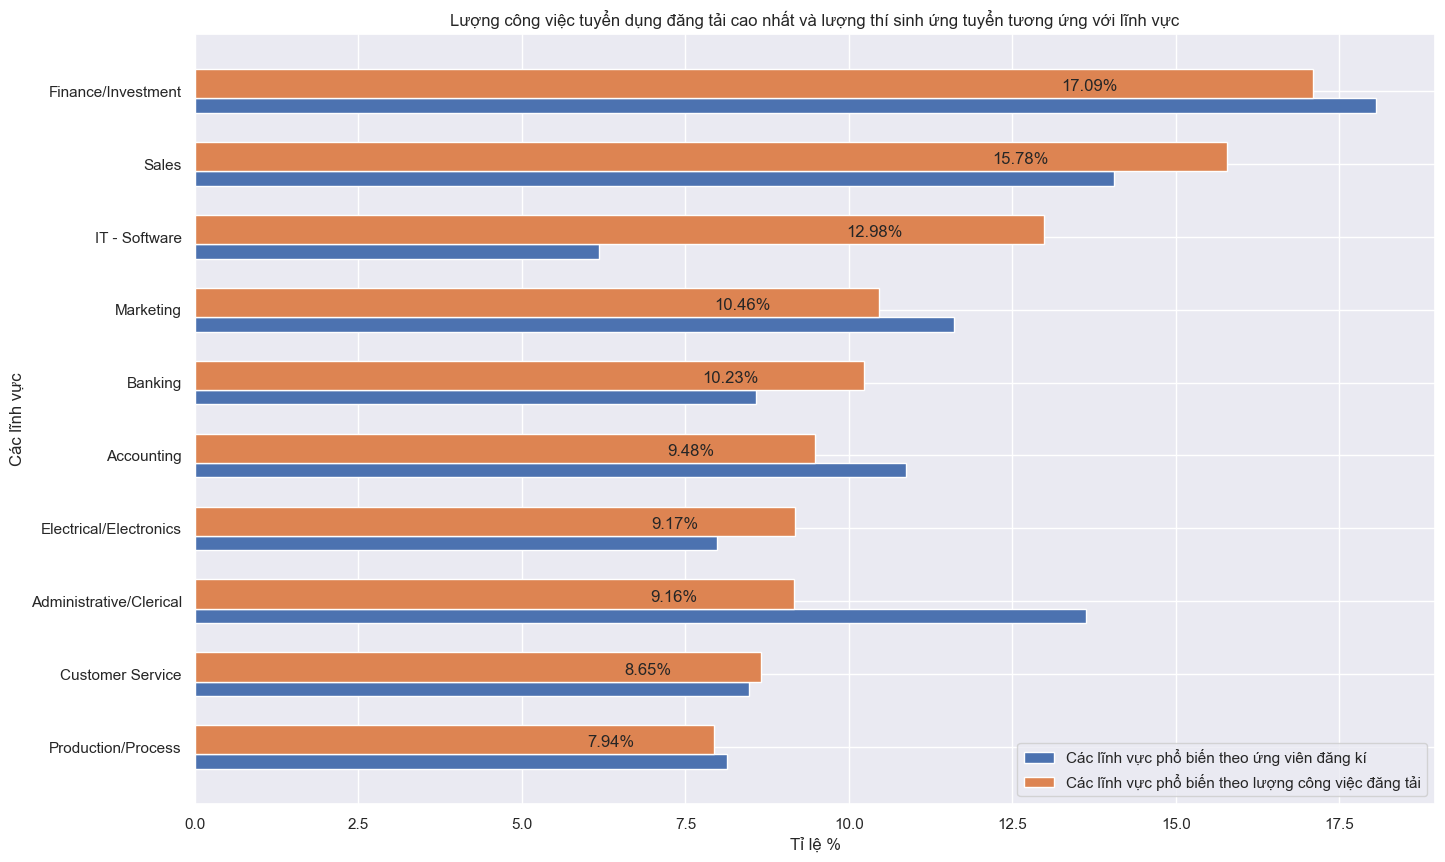

In [9]:
plt.figure(figsize = (16, 10)) 

highest_industries_df = highest_industries_df.sort_values(by='percentOfIndustries',ascending=True)
Y_axis = np.arange(len(highest_industries_df.index))

plt.barh(Y_axis - 0.2, highest_industries_df['percentOfApplications'], 0.2)
bar = plt.barh(Y_axis + 0.1, highest_industries_df['percentOfIndustries'], 0.4)
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.text(x + width * 4/5, y + height / 4, f'{width}%', ha='center')
  
plt.yticks(Y_axis, highest_industries_df.index)
plt.xlabel("Tỉ lệ %")
plt.ylabel('Các lĩnh vực')
plt.title('Lượng công việc tuyển dụng đăng tải cao nhất và lượng thí sinh ứng tuyển tương ứng với lĩnh vực')
plt.legend(labels=['Các lĩnh vực phổ biến theo ứng viên đăng kí','Các lĩnh vực phổ biến theo lượng công việc đăng tải'],loc='lower right',fancybox=True)
plt.show()

Trả lời câu hỏi:
- Các ngành thuộc lĩnh vực kinh tế (Finance/Investment,Sales,Marketing,Banking,Accounting), công nghệ thông tin (IT-Software), kĩ thuật (Electical/Electronic) có số lượng công việc tuyển dụng được đăng tải nhiều nhất. Đây cũng phản ánh xu thế chung của thế giới hiện nay, đặc biệt kể từ sau đại dịch khi nền kinh tế bị tổn hại nặng nề. Việc thúc đẩy tăng trưởng kinh tế luôn là nhiệm vụ cấp thiết của mỗi quốc gia, trong đó tất nhiên có cả Việt Nam. Bên cạnh đó, với cuộc cách mạng công nghiệp 4.0 và sắp đến sẽ là 5.0, các ngành khoa học, công nghệ cũng đang có một vị thế riêng cho mình. 

- Hầu hết phần trăm các ngành có lượng công việc đăng tải cao, thì tương ứng với đó số lượng ứng viên đăng kí cũng tăng theo tương ứng. Nhưng ở lĩnh vực IT-Software, lượng ứng tuyển còn hơi thấp so với nhu cầu. Dù làn sóng sa thải nhân viên ở lĩnh vực công nghệ thông tin trên thế giới đang diễn ra hết sức đáng quan ngại song có lẽ nó sẽ không ảnh hưởng quá nhiều đến việc tuyển dụng của các công ty tại Việt Nam. Nguyên nhân có thể được giải thích khi đây vẫn là một ngành rất mới tại Việt Nam, cùng với đó chi phí cho nhân công khá rẻ nên vẫn là một thị trường béo bở cho các doanh nghiệp nước ngoài.  